<a href="https://colab.research.google.com/github/pks98/NLP_Reviews/blob/main/EDA_model_buliding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import numpy as np
import re
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('reviews.csv',usecols=['Review_Title','Reviews','Rating'])

In [9]:
df.head()

,Review_Title,Reviews,Rating
0,AWESOME...IN LOVE WITH IT !,Really impressed with the fastest delivery of ...,5.0
1,Enjoy while it lasts,This is the second time I am writing this revi...,2.0
2,Good,1. Quite good look2. Better noise cancellation...,4.0
3,not great,its a good set of ear buds but1. the quality o...,1.0
4,Best buds in the budget with Type C,I have been researching about getting a nice T...,5.0


In [10]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
port_stem=PorterStemmer()
def text_processing(text):
  text=re.sub('[^a-zA-Z]',' ',text)
  text=text.lower()
  text=text.split()
  text = [port_stem.stem(word) for word in text if not word in stopwords.words('english')]
  text = ' '.join(text)
  return text

In [14]:
df['Reviews']

0       Really impressed with the fastest delivery of ...
1       This is the second time I am writing this revi...
2       1. Quite good look2. Better noise cancellation...
3       its a good set of ear buds but1. the quality o...
4       I have been researching about getting a nice T...
                              ...                        
3615    I purchased my earphones on 5th Nov 2020 , 25t...
3616    Sound is too goodBty is also goodCharging spee...
3617    Was doing good for the 1st month. Thenit stopp...
3618    This product had stopped working after the 1 m...
3619    Sound quality is very good. But after using fo...
Name: Reviews, Length: 3620, dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3620 entries, 0 to 3619
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Review_Title  3620 non-null   object 
 1   Reviews       3517 non-null   object 
 2   Rating        3620 non-null   float64
dtypes: float64(1), object(2)
memory usage: 85.0+ KB


In [17]:
df.isna().sum()

Review_Title      0
Reviews         103
Rating            0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df.isna().sum()

Review_Title    0
Reviews         0
Rating          0
dtype: int64

In [20]:
df.head()

,Review_Title,Reviews,Rating
0,AWESOME...IN LOVE WITH IT !,Really impressed with the fastest delivery of ...,5.0
1,Enjoy while it lasts,This is the second time I am writing this revi...,2.0
2,Good,1. Quite good look2. Better noise cancellation...,4.0
3,not great,its a good set of ear buds but1. the quality o...,1.0
4,Best buds in the budget with Type C,I have been researching about getting a nice T...,5.0


In [22]:
df['processed_review']=df['Reviews'].apply(text_processing)

In [23]:
df.head()

,Review_Title,Reviews,Rating,processed_review
0,AWESOME...IN LOVE WITH IT !,Really impressed with the fastest delivery of ...,5.0,realli impress fastest deliveri amazon order y...
1,Enjoy while it lasts,This is the second time I am writing this revi...,2.0,second time write review sure earlier detail r...
2,Good,1. Quite good look2. Better noise cancellation...,4.0,quit good look better nois cancel good base qu...
3,not great,its a good set of ear buds but1. the quality o...,1.0,good set ear bud qualiti sound get bad connect...
4,Best buds in the budget with Type C,I have been researching about getting a nice T...,5.0,research get nice tw bud everyday use prioriti...


In [24]:
x=df['processed_review']
y=df['Rating']

In [25]:
df['Rating'].value_counts()

5.0    1053
1.0     887
4.0     717
3.0     507
2.0     353
Name: Rating, dtype: int64

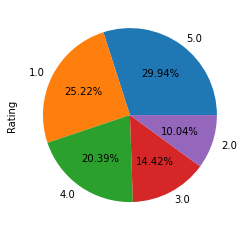

In [30]:
df['Rating'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [34]:
vec=TfidfVectorizer()

x=vec.fit_transform(x)

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [36]:
x_train.shape,x_test.shape


((2813, 6337), (704, 6337))

In [37]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test)
print('The accuracy of the train data is : ',np.round(accuracy_score(train_pred,y_train),2))
print('The accuracy of the test data is : ',np.round(accuracy_score(test_pred,y_test),2))

The accuracy of the train data is :  0.73
The accuracy of the test data is :  0.51


In [38]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
train_pred=svc.predict(x_train)
test_pred=svc.predict(x_test)
print('The accuracy of the train data is : ',np.round(accuracy_score(train_pred,y_train),2))
print('The accuracy of the test data is : ',np.round(accuracy_score(test_pred,y_test),2))

The accuracy of the train data is :  0.92
The accuracy of the test data is :  0.51


In [39]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
train_pred=dt.predict(x_train)
test_pred=dt.predict(x_test)
print('The accuracy of the train data is : ',np.round(accuracy_score(train_pred,y_train),2))
print('The accuracy of the test data is : ',np.round(accuracy_score(test_pred,y_test),2))

The accuracy of the train data is :  0.98
The accuracy of the test data is :  0.36


In [40]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
train_pred=rf.predict(x_train)
test_pred=rf.predict(x_test)
print('The accuracy of the train data is : ',np.round(accuracy_score(train_pred,y_train),2))
print('The accuracy of the test data is : ',np.round(accuracy_score(test_pred,y_test),2))

The accuracy of the train data is :  0.98
The accuracy of the test data is :  0.48


In [41]:
from sklearn.ensemble import GradientBoostingClassifier

gf=GradientBoostingClassifier()
gf.fit(x_train,y_train)
train_pred=gf.predict(x_train)
test_pred=gf.predict(x_test)
print('The accuracy of the train data is : ',np.round(accuracy_score(train_pred,y_train),2))
print('The accuracy of the test data is : ',np.round(accuracy_score(test_pred,y_test),2))

The accuracy of the train data is :  0.77
The accuracy of the test data is :  0.46


In [42]:
from sklearn.ensemble import AdaBoostClassifier

af=AdaBoostClassifier()
af.fit(x_train,y_train)
train_pred=af.predict(x_train)
test_pred=af.predict(x_test)
print('The accuracy of the train data is : ',np.round(accuracy_score(train_pred,y_train),2))
print('The accuracy of the test data is : ',np.round(accuracy_score(test_pred,y_test),2))

The accuracy of the train data is :  0.48
The accuracy of the test data is :  0.43


In [43]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(x_train,y_train)
train_pred=xgb.predict(x_train)
test_pred=xgb.predict(x_test)
print('The accuracy of the train data is : ',np.round(accuracy_score(train_pred,y_train),2))
print('The accuracy of the test data is : ',np.round(accuracy_score(test_pred,y_test),2))

The accuracy of the train data is :  0.69
The accuracy of the test data is :  0.49


In [49]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
#n_estimators = [20,60,100,120]

n_estimators = range(10,100,10)


# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
#max_depth = [2,8,None]

max_depth = range(2,15,2)

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]


In [50]:
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }

In [51]:
rf_grid = RandomizedSearchCV(estimator = rf, 
                       param_distributions = params, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 380, in fit
    "`max_sample` cannot be set if `bootstrap=False`. "
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  warnings.warn(some_fits_failed_message, FitF

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(2, 15, 2),
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': range(10, 100, 10)},
                   verbose=2)

In [52]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=14, max_features=0.2, max_samples=1.0,
                       min_samples_leaf=2, n_estimators=30)

In [53]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 14,
 'max_features': 0.2,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 30}

In [54]:
rf_grid.best_score_

0.46178833524016605

In [48]:
def modify_rating(rating):
  if rating>=4:
    return 'good'
  elif rating>=3 and rating<4:
    return 'average'
  else:
    return 'poor'

In [57]:
df['lable']=df['Rating'].apply(modify_rating)

In [58]:
df.head()

,Review_Title,Reviews,Rating,processed_review,lable
0,AWESOME...IN LOVE WITH IT !,Really impressed with the fastest delivery of ...,5.0,realli impress fastest deliveri amazon order y...,good
1,Enjoy while it lasts,This is the second time I am writing this revi...,2.0,second time write review sure earlier detail r...,poor
2,Good,1. Quite good look2. Better noise cancellation...,4.0,quit good look better nois cancel good base qu...,good
3,not great,its a good set of ear buds but1. the quality o...,1.0,good set ear bud qualiti sound get bad connect...,poor
4,Best buds in the budget with Type C,I have been researching about getting a nice T...,5.0,research get nice tw bud everyday use prioriti...,good


In [59]:
df['lable'].value_counts()

good       1770
poor       1240
average     507
Name: lable, dtype: int64

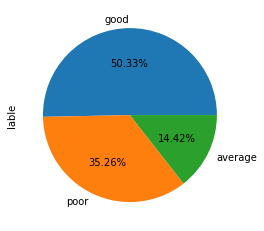

In [60]:
df['lable'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [62]:
df['lable_val']=df['lable'].map({'good':2,'average':1,'poor':0})

In [71]:
df.sample(5)

,Review_Title,Reviews,Rating,processed_review,lable,lable_val
1300,"Only for mobile use, no noise cancellation and...",Sound quality is good. No noise cancellation a...,4.0,sound qualiti good nois cancel need speak bit ...,good,2
3029,Check whether the airpods charging correctly o...,"Sound, noise, bass quality is best. But one of...",3.0,sound nois bass qualiti best one airpod charg ...,average,1
16,Must buy if you are a basshead,"If you are a fan of bass like I am, hell, you ...",5.0,fan bass like hell gonna love airdop use boat ...,good,2
3386,Connectivity issue is recurring. Sound qualit...,Never buy this product. Many Times it so happe...,1.0,never buy product mani time happen person call...,poor,0
1088,Not durable.,Bad quality. Did not last even 3 months. The l...,5.0,bad qualiti last even month left cup stop char...,good,2


In [64]:
y=df['lable_val']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

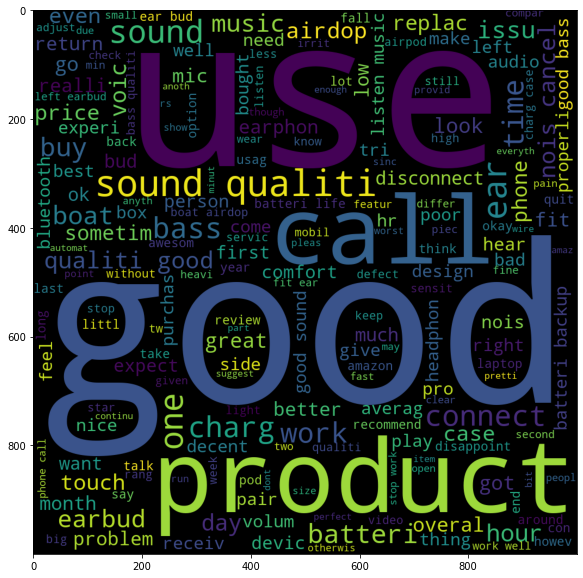

In [68]:
from wordcloud import WordCloud

wc=WordCloud(width=1000,height=1000)
wordcloud=wc.generate(df[df['lable_val']==1]['processed_review'].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)

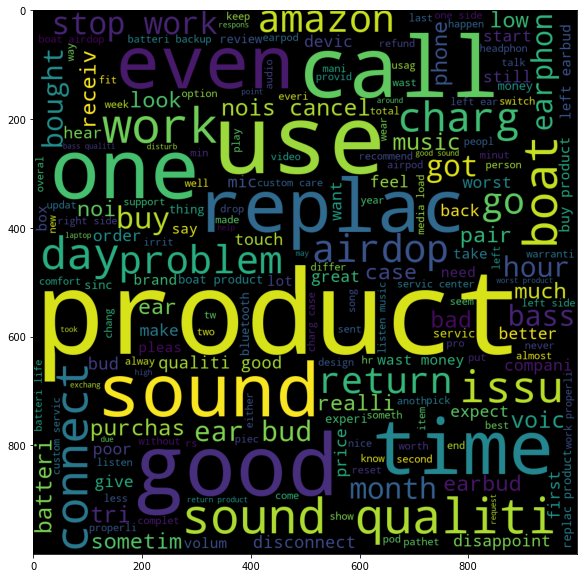

In [69]:
wc=WordCloud(width=1000,height=1000)
wordcloud=wc.generate(df[df['lable_val']==0]['processed_review'].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)

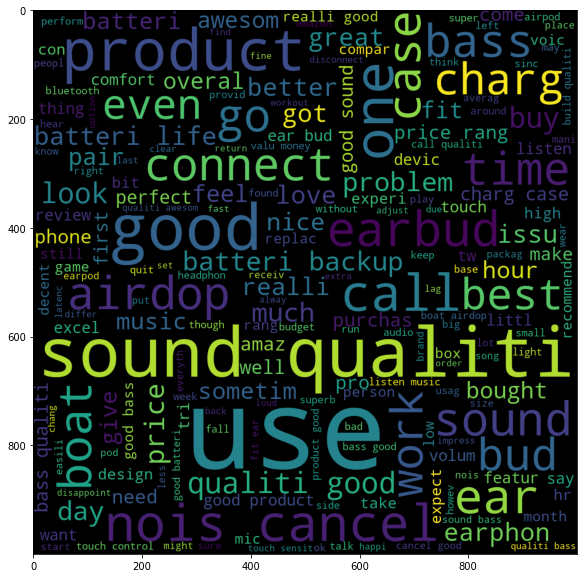

In [70]:
wc=WordCloud(width=1000,height=1000)
wordcloud=wc.generate(df[df['lable_val']==2]['processed_review'].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)

In [72]:
tf=TfidfVectorizer(max_features=3000)

In [106]:
df.head()

,Review_Title,Reviews,Rating,processed_review,lable,lable_val
0,AWESOME...IN LOVE WITH IT !,Really impressed with the fastest delivery of ...,5.0,realli impress fastest deliveri amazon order y...,good,2
1,Enjoy while it lasts,This is the second time I am writing this revi...,2.0,second time write review sure earlier detail r...,poor,0
2,Good,1. Quite good look2. Better noise cancellation...,4.0,quit good look better nois cancel good base qu...,good,2
3,not great,its a good set of ear buds but1. the quality o...,1.0,good set ear bud qualiti sound get bad connect...,poor,0
4,Best buds in the budget with Type C,I have been researching about getting a nice T...,5.0,research get nice tw bud everyday use prioriti...,good,2


In [107]:
good_corpus=[]
for reviews in df[df['lable_val']==2]['processed_review'].tolist():
  for word in reviews.split():
    good_corpus.append(word)

In [108]:
len(good_corpus)

65643

In [109]:
average_corpus=[]
for reviews in df[df['lable_val']==1]['processed_review'].tolist():
  for word in reviews.split():
    average_corpus.append(word)

In [110]:
len(average_corpus)

16783

In [111]:
poor_corpus=[]
for reviews in df[df['lable_val']==0]['processed_review'].tolist():
  for word in reviews.split():
    poor_corpus.append(word)

In [112]:
len(poor_corpus)

41368

In [113]:
from collections import Counter

good_corpus_data=Counter(good_corpus).most_common(50)
good_corpus_df=pd.DataFrame(good_corpus_data,columns=['word','frequency'])
good_corpus_df.head()

,word,frequency
0,good,1891
1,qualiti,1475
2,sound,1388
3,use,1149
4,product,1095


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


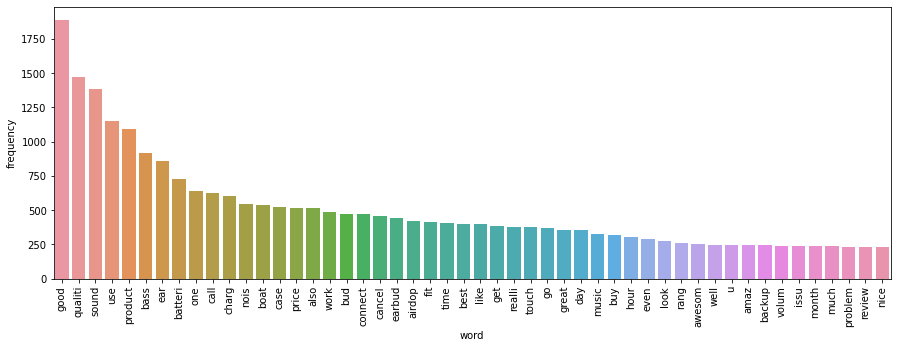

In [116]:
plt.figure(figsize=(15,5))
plt.xticks(rotation='vertical')
sns.barplot(good_corpus_df['word'],good_corpus_df['frequency'])

In [114]:
average_corpus_data=Counter(average_corpus).most_common(50)
average_corpus_df=pd.DataFrame(average_corpus_data,columns=['word','frequency'])
average_corpus_df.head()

,word,frequency
0,good,484
1,sound,360
2,qualiti,326
3,use,319
4,product,276


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


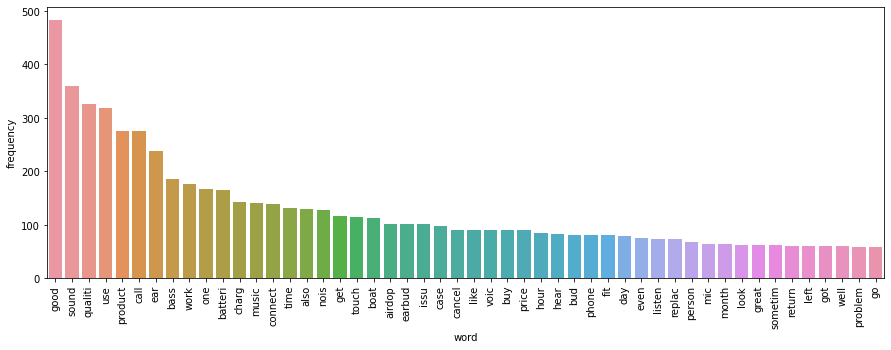

In [117]:
plt.figure(figsize=(15,5))
plt.xticks(rotation='vertical')
sns.barplot(average_corpus_df['word'],average_corpus_df['frequency'])

In [115]:
poor_corpus_data=Counter(poor_corpus).most_common(50)
poor_corpus_df=pd.DataFrame(poor_corpus_data,columns=['word','frequency'])
poor_corpus_df.head()

,word,frequency
0,product,1156
1,sound,646
2,use,625
3,qualiti,607
4,work,606


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


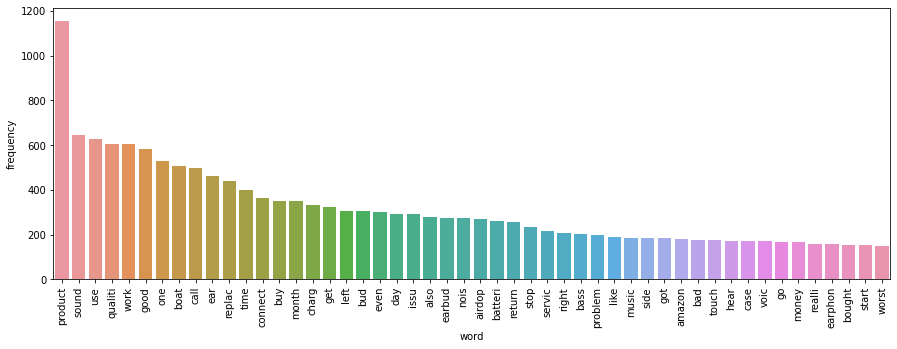

In [118]:
plt.figure(figsize=(15,5))
plt.xticks(rotation='vertical')
sns.barplot(poor_corpus_df['word'],poor_corpus_df['frequency'])

In [74]:
x=tf.fit_transform(df['processed_review']).toarray()
y=df['lable_val'].values


In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [80]:
from sklearn.metrics import precision_score

In [76]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [85]:
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print(accuracy_score(y_test,pred))



0.3778409090909091


In [84]:
mnb.fit(x_train,y_train)
pred=mnb.predict(x_test)
print(accuracy_score(y_test,pred))


0.6946022727272727


In [86]:
bnb.fit(x_train,y_train)
pred=bnb.predict(x_test)
print(accuracy_score(y_test,pred))


0.6761363636363636


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier


In [88]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [89]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    
    return accuracy

In [91]:
accuracy_scores = []

for name,clf in clfs.items():
    
    current_accuracy = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    accuracy_scores.append(current_accuracy)

In [94]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores}).sort_values('Accuracy',ascending=False)


In [95]:
performance_df 

,Algorithm,Accuracy
0,SVC,0.703125
5,RF,0.696023
2,NB,0.694602
8,ETC,0.694602
4,LR,0.688920
9,GBDT,0.681818
10,xgb,0.671875
7,BgC,0.659091
6,AdaBoost,0.639205
3,DT,0.612216


In [97]:
x_test[0].reshape(-1,1)

array([0., 0., 0., ..., 0., 0., 0.])

In [127]:
svc.predict(x_test[26].reshape(1,-1))

array([2])

In [128]:
y_test[26]

2